# Проект: Прогнозирование выживаемости стартапов: анализ факторов успеха

#### **Введение**

В современном мире стартапы играют важную роль в экономике, инновациях и создании новых рабочих мест. Однако высокая степень неопределенности в их жизни делает предсказание их успешности сложной задачей. В этом проекте мы стремимся разработать модель машинного обучения, которая будет предсказывать, закроется ли стартап или продолжит свою деятельность.

Данные, используемые в проекте, представляют собой информацию о стартапах, собранную за период с 1970 по 2018 годы. Эти данные содержат как реальные, так и синтетические элементы, что делает их почти идеальными для анализа и обучения моделей.

#### **Описание проекта и данных**

Проект состоит из следующих файлов данных:
- **kaggle_startups_train_01.csv**: тренировочный набор данных с информацией о стартапах (около 53,000 записей), включая целевой признак `status`, который показывает, закрылся стартап или продолжает действовать.
- **kaggle_startups_test_01.csv**: тестовый набор данных (около 13,000 записей), для которого необходимо предсказать значение `status`.

#### **Описание полей данных**
- **name**: Название стартапа.
- **category_list**: Список категорий, к которым относится стартап.
- **funding_total_usd**: Общая сумма финансирования в USD.
- **status**: Статус стартапа (закрыт или действующий).
- **country_code**: Код страны.
- **state_code**: Код штата.
- **region**: Регион.
- **city**: Город.
- **funding_rounds**: Количество раундов финансирования.
- **founded_at**: Дата основания.
- **first_funding_at**: Дата первого раунда финансирования.
- **last_funding_at**: Дата последнего раунда финансирования.
- **closed_at**: Дата закрытия стартапа (если применимо).
- **lifetime**: Время существования стартапа в днях.

#### **Цели проекта**
1. Разработать модель машинного обучения для предсказания продолжения деятельности стартапа.
2. Провести полноценный разведочный анализ и сформировать рекомендации для будущих создателей стартапов о факторах, влияющих на успешность.

#### **Задачи проекта**
1. [x] Загрузка и ознакомление с данными.
2. [x] Предварительная обработка данных, включая обработку пропусков и категориальных признаков.
3. [x] Проведение разведочного анализа данных (EDA).
4. [ ] Создание новых синтетических признаков для улучшения модели.
5. [ ] Проверка на мультиколлинеарность и отбор финального набора признаков.
6. [ ] Выбор и обучение моделей машинного обучения для предсказания `status`.
7. [ ] Оценка качества предсказаний с использованием метрики F1-Score.
8. [ ] Анализ важности признаков модели и формулирование рекомендаций.

#### **Примерный план действий** !удалить перед сдачей!
1. **Загрузка данных**:
   - Импортировать необходимые библиотеки и загрузить датасеты.
   
2. **Предварительная обработка данных**:
   - Обработать пропуски и преобразовать категориальные признаки в числовые.

3. **Разведочный анализ данных**:
   - Визуализировать распределение признаков и их взаимосвязи.
   - Определить ключевые факторы, влияющие на успешность стартапов.

4. **Создание новых признаков**:
   - На основе имеющихся данных создать новые синтетические признаки, которые могут улучшить модель.

5. **Моделирование**:
   - Выбрать несколько моделей для обучения (например, логистическая регрессия, градиентный бустинг).
   - Обучить модели и оценить их производительность.

6. **Оценка качества**:
   - Использовать F1-Score для оценки качества предсказаний и выбрать лучшую модель.

7. **Анализ важности признаков**:
   - Проанализировать, какие признаки наибольшим образом способствуют предсказанию успешности стартапа.

8. **Подготовка отчета**:
   - Подготовить отчет по исследованию, включая визуализации и рекомендации для стартапов.

## Загрузка данных и импорт необходимых библиотек

In [1]:
!pip install phik
!pip install shap
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_auc_score
import phik
import shap
import missingno as msno

## Изучение общей информации о полученном датафрейме

### Загрузка данных

In [3]:
try:
    train = pd.read_csv(r'D:\dev\study\practicum\14. Мастерская\practice\datasets\kaggle_startups_train_28062024.csv', sep=',')
    test = pd.read_csv(r'D:\dev\study\practicum\14. Мастерская\practice\datasets\kaggle_startups_test_28062024.csv', sep=',')
except Exception as e:
    print(f"Произошла ошибка: {e}")

Данные загружены успешно, все библиотеки импортированы.

### Изучение данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


None

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
0,Lunchgate,Online Reservations|Restaurants,828626.0,operating,CHE,25,Zurich,Zürich,2,2009-10-17,2011-05-01,2014-12-01,NaN
1,EarLens,Manufacturing|Medical|Medical Devices,42935019.0,operating,USA,CA,SF Bay Area,Redwood City,4,2005-01-01,2010-05-04,2014-02-25,NaN
2,Reviva Pharmaceuticals,Biotechnology,35456381.0,operating,USA,CA,SF Bay Area,San Jose,3,2006-01-01,2012-08-20,2014-07-02,NaN
3,Sancilio and Company,Health Care,22250000.0,operating,NaN,NaN,NaN,NaN,3,2004-01-01,2011-09-01,2014-07-18,NaN
4,WireTough Cylinders,Manufacturing,NaN,operating,USA,VA,VA - Other,Bristol,1,2010-05-12,2012-02-01,2012-02-01,NaN


,funding_total_usd,funding_rounds
count,4.244700e+04,52516.000000
mean,1.824748e+07,1.740670
std,1.871173e+08,1.374522
min,1.000000e+00,1.000000
25%,3.360275e+05,1.000000
50%,2.000000e+06,1.000000
75%,1.000000e+07,2.000000
max,3.007950e+10,19.000000


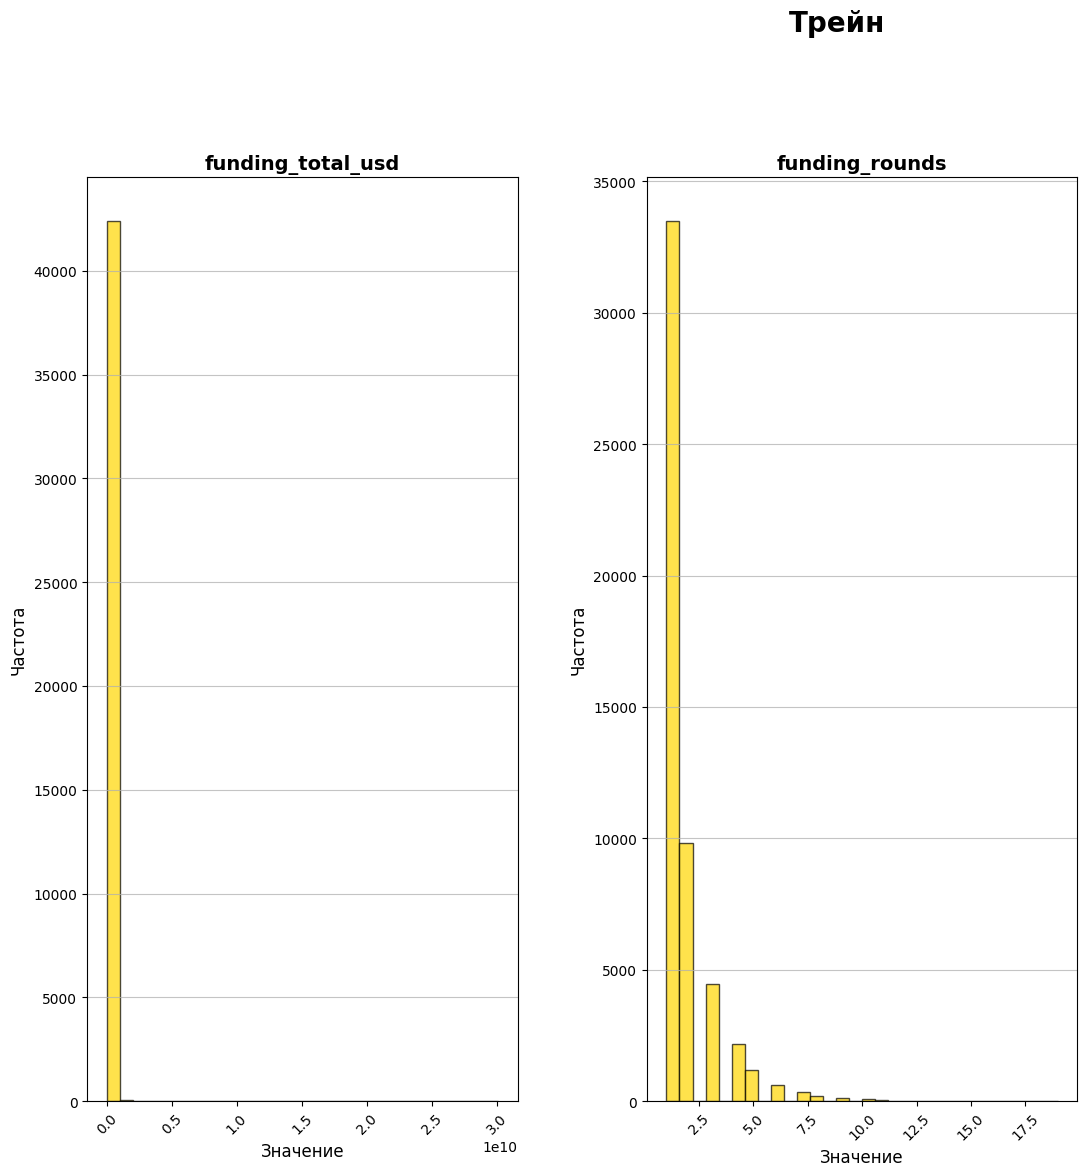

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


None

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


,funding_total_usd,funding_rounds,lifetime
count,1.054700e+04,13125.000000,13125.000000
mean,1.654910e+07,1.714438,3097.609524
std,9.217283e+07,1.318800,2128.356554
min,1.000000e+00,1.000000,52.000000
25%,3.200000e+05,1.000000,1726.000000
50%,2.000000e+06,1.000000,2526.000000
75%,1.000000e+07,2.000000,3866.000000
max,4.715000e+09,15.000000,17167.000000


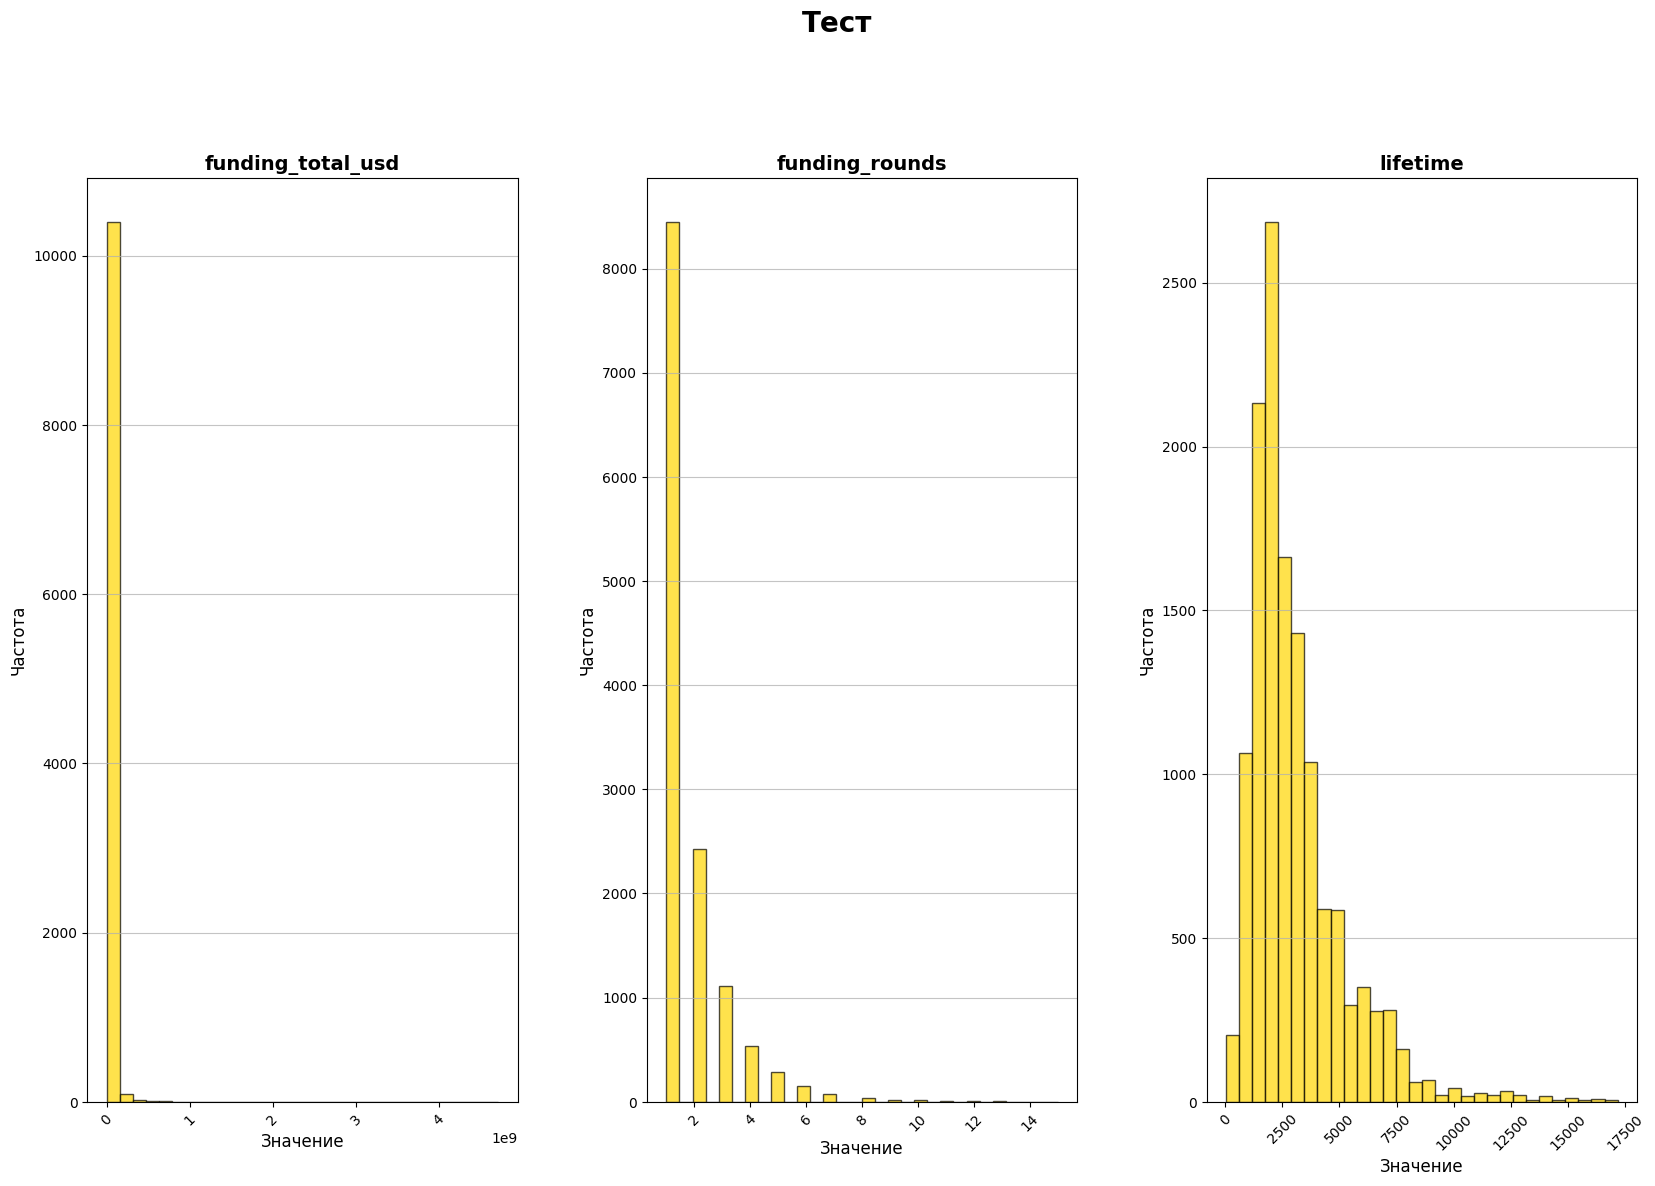

In [4]:
def check_df(df, title):
    # информация о дф
    display(df.info())
    # первые 5 строк
    display(df.head())
    # описательная статистика
    display(df.describe())

    # извлечение только числовых столбцов
    numeric_df = df.select_dtypes(include=['number'])

    if numeric_df.empty:
        print('нет числовых значений')
        return

    # гистограммы
    num_plots = len(numeric_df.columns)
    plt.figure(figsize=(20, 12))
    for i in range(num_plots):
        plt.subplot((num_plots + 2) // 3, 3, i + 1)
        plt.hist(numeric_df.iloc[:, i], bins=30, color='gold', edgecolor='black', alpha=0.7)
        plt.title(numeric_df.columns[i], fontsize=14, fontweight='bold')
        plt.xlabel('Значение', fontsize=12)
        plt.ylabel('Частота', fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', alpha=0.75)

    plt.suptitle(title, fontsize=20, fontweight='bold', y=1.02)
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    plt.show()


check_df(train, title="Трейн")
check_df(test, title="Тест")

### Вывод по изучению данных

*1. Общая информация*

1. **Объем данных**:
   - **Обучающая выборка**: 52,516 записей и 13 столбцов.
   - **Тестовая выборка**: 13,125 записей и 11 столбцов.

2. **Структура данных**:
   - Обучающая выборка включает столбцы:
     - `name`
     - `category_list`
     - `funding_total_usd`
     - `status`
     - `country_code`
     - `state_code`
     - `region`
     - `city`
     - `funding_rounds`
     - `founded_at`
     - `first_funding_at`
     - `last_funding_at`
     - `closed_at`
   - Тестовая выборка включает столбцы:
     - `name`
     - `category_list`
     - `funding_total_usd`
     - `country_code`
     - `state_code`
     - `region`
     - `city`
     - `funding_rounds`
     - `first_funding_at`
     - `last_funding_at`
     - `lifetime`

*2. Пропуски и неполные данные*

1. **Обучающая выборка**:
   - Пропуски в столбцах:
     - `category_list`: 1,465
     - `funding_total_usd`: 12,069
     - `country_code`: 8,502
     - `state_code`: 8,763
     - `region`: 3,359
     - `city`: 3,359
     - `closed_at`: 47,599
   - Наиболее значительные пропуски в `funding_total_usd`, `country_code`, и `state_code`.

2. **Тестовая выборка**:
   - Пропуски в столбцах:
     - `category_list`: 5,591
     - `funding_total_usd`: 7,578
     - `country_code`: 1,382
     - `state_code`: 695
     - `region`: 589
     - `city`: 587

*3. Статистический анализ*

1. **Обучающая выборка**:
   - `funding_total_usd`:
     - Среднее значение: ~18,247,480 USD
     - Минимальное значение: 1 USD
     - Максимальное значение: 30,079,500,000 USD
     - Стандартное отклонение: 186,117,300 USD
   - `funding_rounds`:
     - Среднее значение: ~1.74
     - Максимум: 19

2. **Тестовая выборка**:
   - `funding_total_usd`:
     - Среднее значение: ~16,549,100 USD
     - Минимальное значение: 1 USD
     - Максимальное значение: 4,715,000,000 USD
   - `funding_rounds`:
     - Среднее значение: ~1.71
     - Максимум: 15

*4. Временные характеристики*

- Обучающая выборка включает даты:
  - `founded_at`
  - `first_funding_at`
  - `last_funding_at`
  - `closed_at`
- Тестовая выборка включает даты:
  - `first_funding_at`
  - `last_funding_at`
  - `lifetime`

*5. Выводы и рекомендации*

1. **Обработка пропусков**:
   - Провести анализ пропусков и определить, как с ними поступить (удалить, заполнить средней или медианой).

2. **Классификация стартапов**:
   - Столбец `category_list` может быть полезен для кластеризации и анализа по категориям.

3. **Моделирование**:
   - Учитывать временные характеристики при создании моделей предсказания.
  
4. **Рекомендации по замене типов данных**:
  - Обучающая выборка (`train`)
    - **founded_at**: преобразовать в `datetime`.
    - **first_funding_at**: преобразовать в `datetime`.
    - **last_funding_at**: преобразовать в `datetime`.
    - **closed_at**: преобразовать в `datetime` (учесть возможные `NaN`).

  - Тестовая выборка (`test`)
    - **first_funding_at**: преобразовать в `datetime`.
    - **last_funding_at**: преобразовать в `datetime`.

## Предобработка данных

### Обработка дубликатов

#### Обработка неявных дубликатов

In [5]:
def preprocess_column(column):
    return (column.str.lower()
     .str.replace('_', ' ', regex=False)
     .str.replace('|', ' ', regex=False))

def display_value_counts(df, columns):
    for column in columns:
        df[column] = preprocess_column(df[column])
        
        # выделение заголовка поля
        print(f'**{column}**')
        display(df[column].value_counts())
        print('*************************************')
        
    print('_____________________________________')

# для обучающей выборки
display_value_counts(train, [
    'name',
    'category_list',
    'status',
    'country_code',
    'state_code',
    'region',
    'city'
])

**name**


name
meetapp          2
sip              2
genomed          2
stride health    2
sidestep         2
                ..
videostream      1
hello curry      1
taskforce        1
netscaler        1
apparcando       1
Name: count, Length: 52472, dtype: int64

*************************************
**category_list**


category_list
software                                                                        3207
biotechnology                                                                   2905
e-commerce                                                                      1064
mobile                                                                           920
clean technology                                                                 892
                                                                                ... 
anything capital intensive news trading                                            1
cloud computing financial services investment management                           1
big data analytics business services reputation sales and marketing software       1
business services design user experience design web design                         1
analytics enterprises enterprise software software                                 1
Name: count, Length: 22091, dtype: int64

*************************************
**status**


status
operating    47599
closed        4917
Name: count, dtype: int64

*************************************
**country_code**


country_code
usa    29702
gbr     2925
can     1540
ind     1276
chn     1240
       ...  
brn        1
som        1
mne        1
syc        1
zmb        1
Name: count, Length: 134, dtype: int64

*************************************
**state_code**


state_code
ca    10219
ny     3112
ma     2020
tx     1562
h9     1510
      ...  
m8        1
j3        1
nu        1
v5        1
u6        1
Name: count, Length: 300, dtype: int64

*************************************
**region**


region
sf bay area        6970
new york city      2776
boston             1890
london             1840
los angeles        1513
                   ... 
tgo - other           1
new westminster       1
haywards heath        1
herzogenaurach        1
doncaster             1
Name: count, Length: 1036, dtype: int64

*************************************
**city**


city
san francisco      2824
new york           2486
london             1514
austin              609
palo alto           607
                   ... 
lauderhill            1
talent                1
peru                  1
north arlington       1
lansdowne             1
Name: count, Length: 4477, dtype: int64

*************************************
_____________________________________


В целом, неявные дубликаты не обнаружены, но на данный момент меня смущает наличие почти 23 тысяч уникальных значений в поле `category_list`

#### Обработка явных дубликатов

In [6]:
# посчитаю количество пропусков и дубликатов в каждом столбце
def analyze_dataframe(df, df_name):
    print(f'Анализ: {df_name}')
    
    # количество пропусков в каждом столбце
    missing_values = df.isnull().sum()
    
    # доля пропущенных значений в процентах
    missing_percentage = (missing_values / len(df)) * 100
    
    # помещение в датафрейм
    missing_df = pd.DataFrame({'Количество пропусков': missing_values, 'Доля, %': missing_percentage})
    
    # сортировка по убыванию доли пропусков
    missing_df = missing_df.sort_values(by='Доля, %', ascending=False)
    
    print('Количество пропусков в каждом столбце:')
    display(missing_df)
    
    # количество дубликатов
    print('Дубликаты:', df.duplicated().sum())
    print()

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
funding_total_usd,10069,19.173204
state_code,6763,12.877980
region,6359,12.108691
city,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



- Обнаружено много пропусков в данных.
- Заполнять пропуски буду с помощью простых моделей машинного обучения без применения :
  - Поля с типом данных `float`, такие как `funding_total_usd` заполню с помощью `линейной регрессии`.
  - Категориальные поля заполню с помощью предсказаний модели `KNN`.
- Поле с датой `closed_at` заполню заполню значением из поля `last_funding_at`, к которому прибавили один год, и при этом установлю `NaT` для тех строк, где в поле `status` стоит значение `operating`, так как действующие компании не могут быть закрытыми.
- Пропуск в поле name заполню значением `unknown`

### Анализ и обработка пропусков

Соберу все пропуски в одной переменной

In [7]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({'Количество пропусков': missing_values, 'Доля, %': missing_percentage})
missing_df = missing_df[missing_df['Количество пропусков'] > 0]
missing_df = missing_df.sort_values(by='Доля, %', ascending=False)

Далее проведу анализ пропущенных значений и попытаюсь выяснить, почему же их так много

<Figure size 1000x600 with 0 Axes>

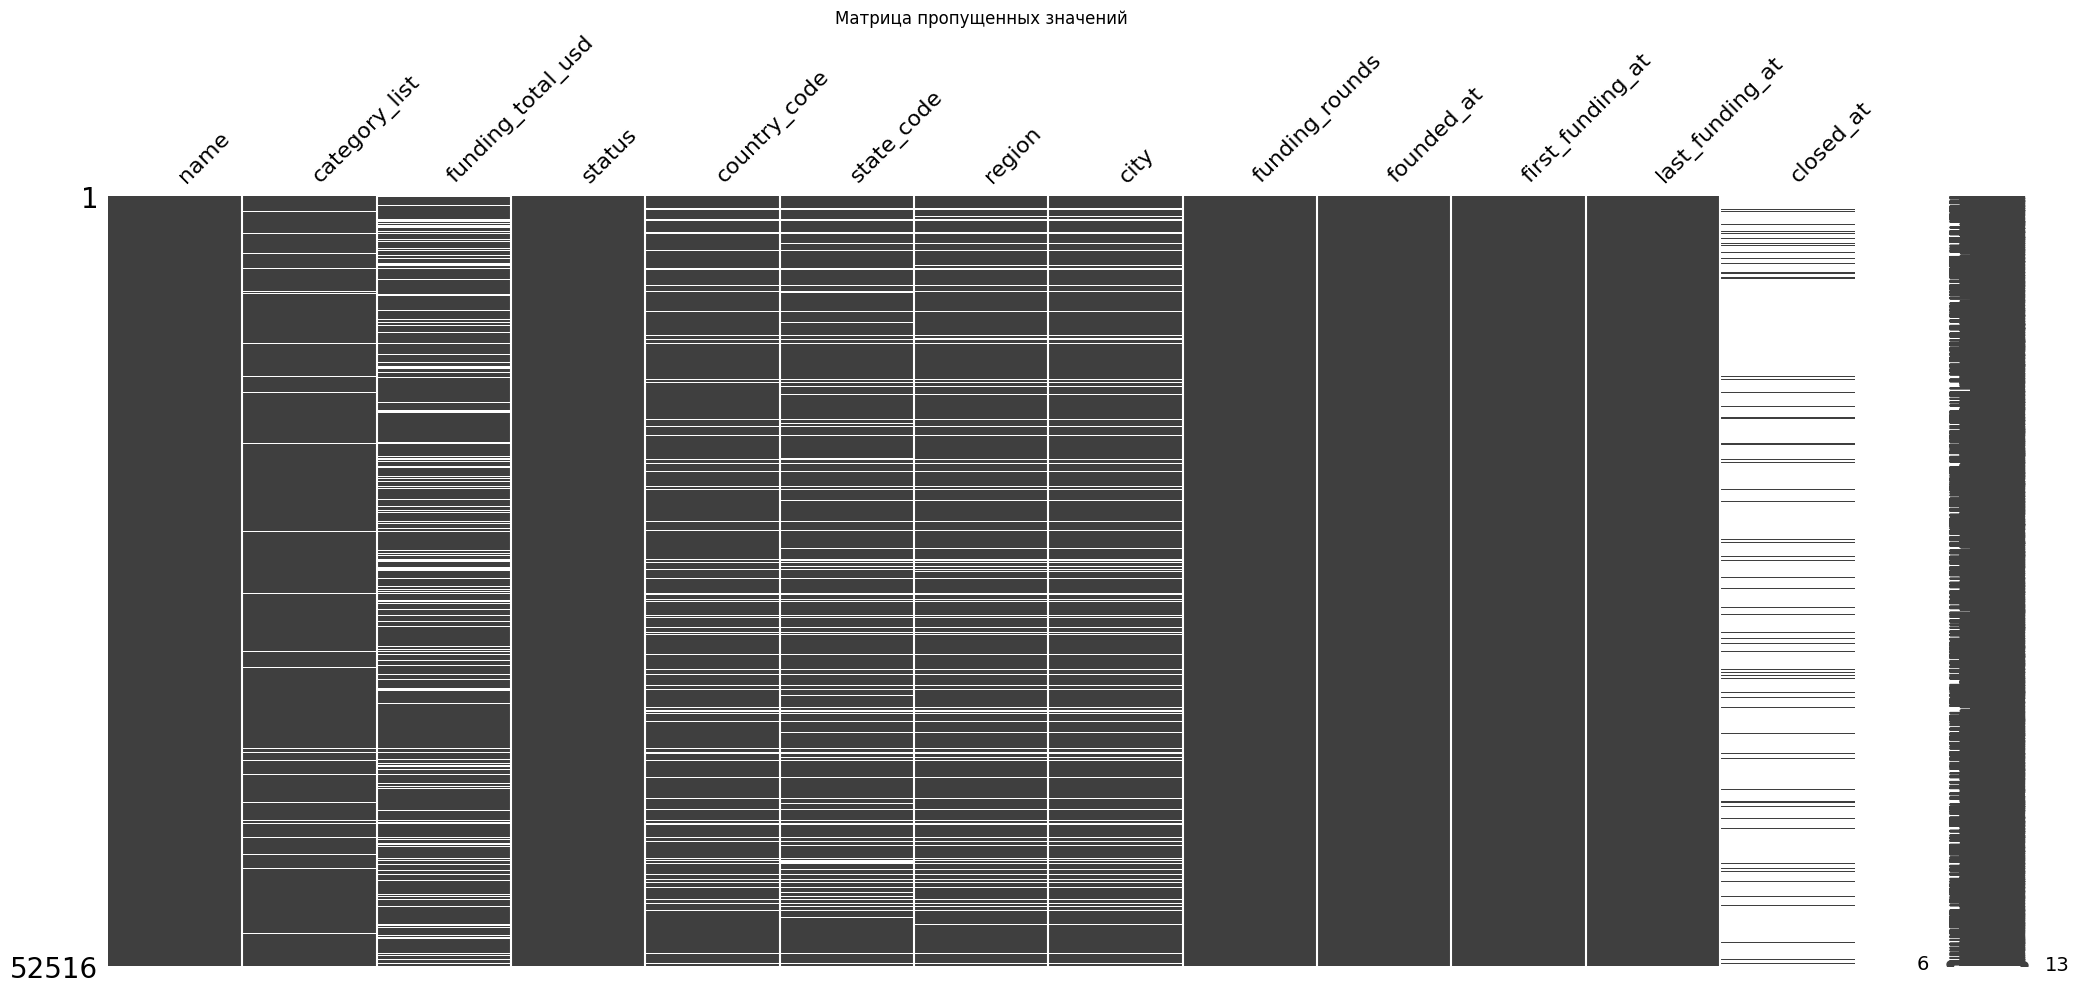

In [8]:
# визуализация пропусков

# матрица пропущенных значений
plt.figure(figsize=(10, 6))
msno.matrix(train)
plt.title("Матрица пропущенных значений")
plt.show()

Пропуски распределены равномерно по всему датасету, но нельзя не заметить сквозные линии пропусков в столбцах `country_code - state_code - region - city`. Это может говорить о том, что пропуски имеют связь и присутсвуют только в определнных строках. Нужно посмотреть на корреляцию признаков, в которых присутсвуют пропуски

<Figure size 1000x600 with 0 Axes>

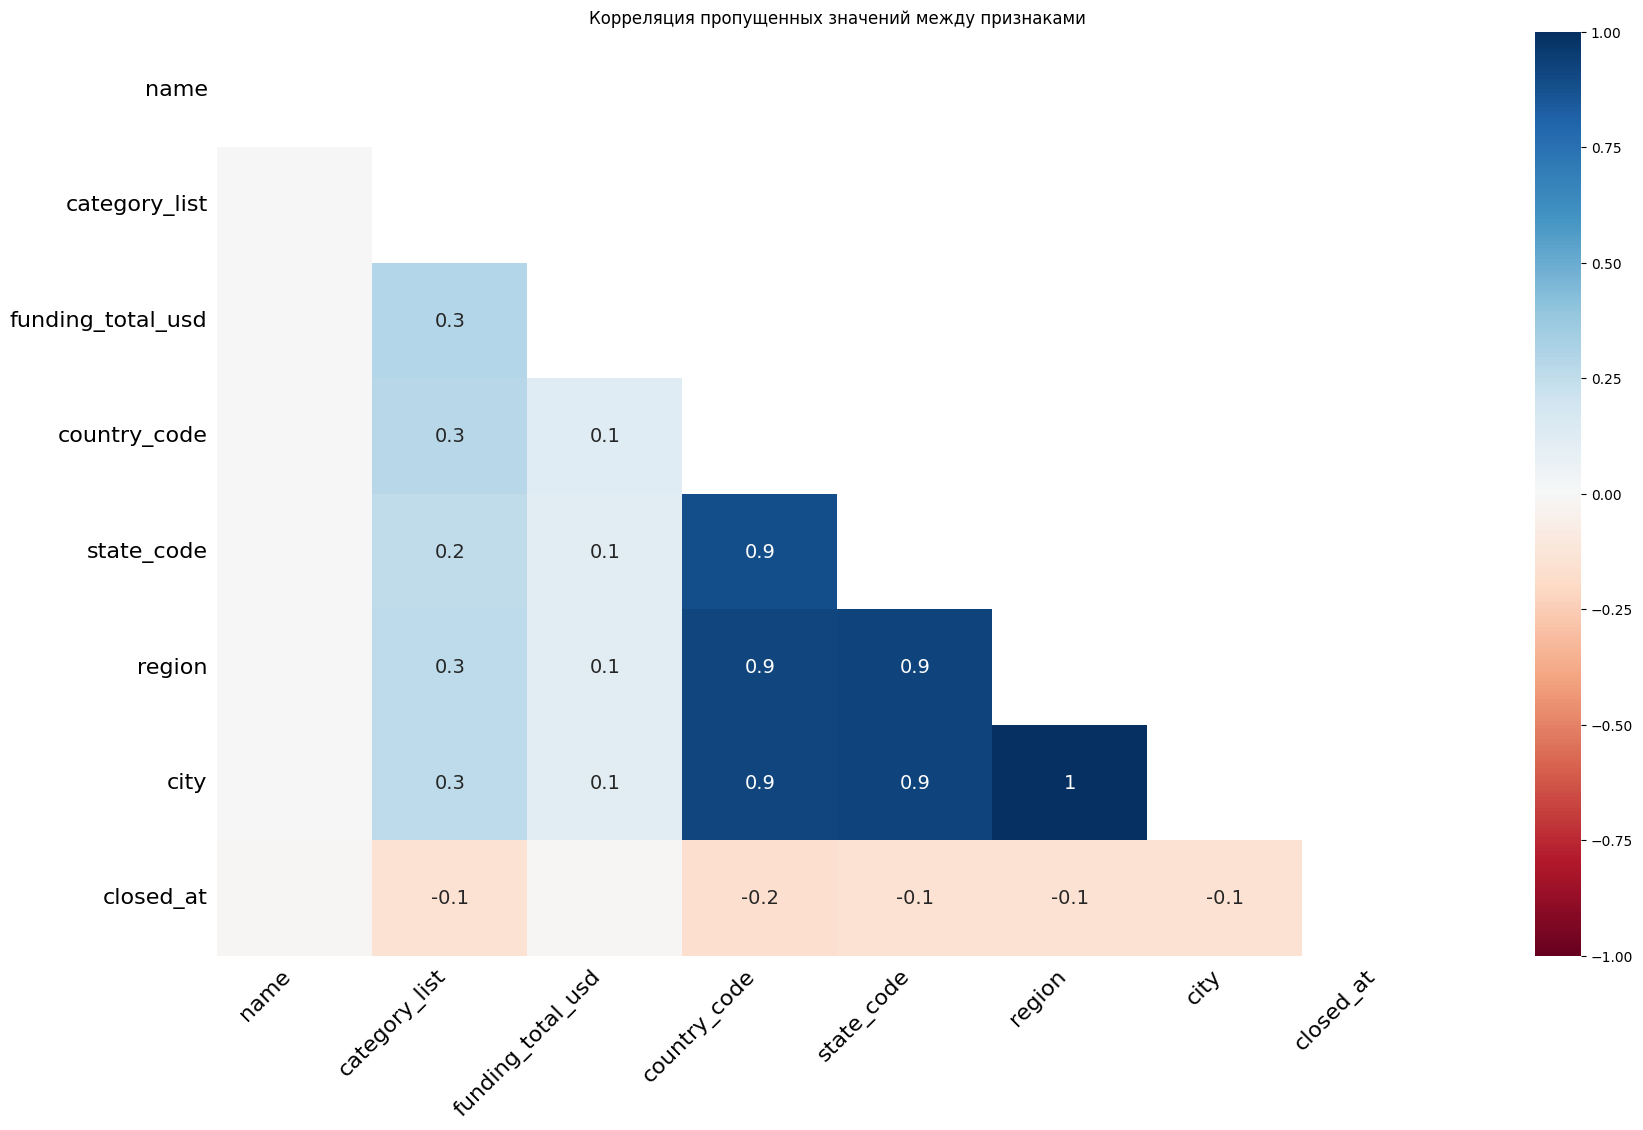

In [9]:
# тепловая карта пропущенных значений (для выявления зависимостей)
plt.figure(figsize=(10, 6))
msno.heatmap(train)
plt.title("Корреляция пропущенных значений между признаками")
plt.show()

Предположение о наличии связи между полями `country_code - state_code - region - city` подтвердилось, корреляция между ними очень сильная, более того, здесь наблюдается мультиколлинеарность и полная линейная зависимость признаков `region - city`. Это может говорить о синтетическом происхождении одного из полей, значит, один из этих столбцов можно удалить или обнулить без потери в качестве данных.

Посмотрю на распределение пропусков по целевому признаку ниже

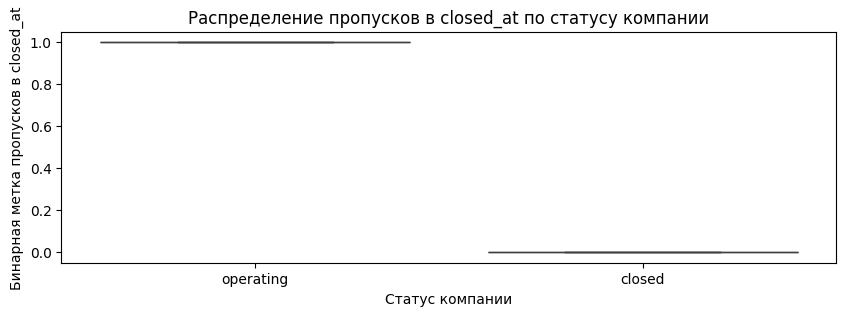

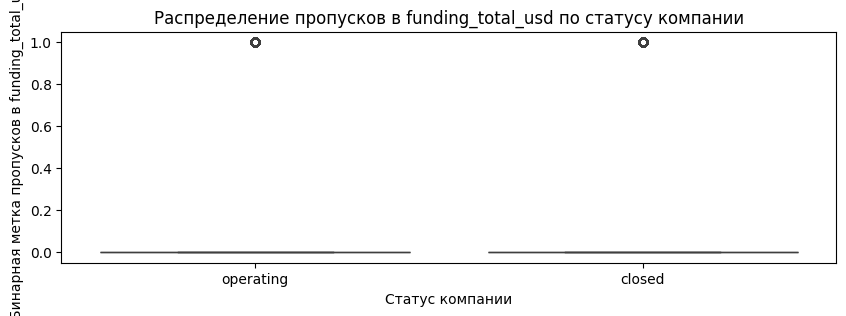

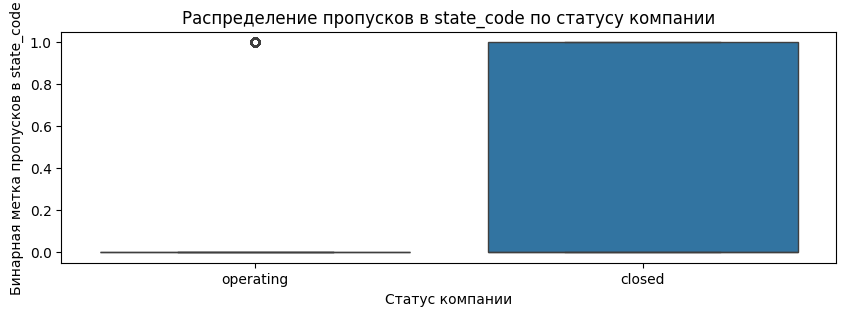

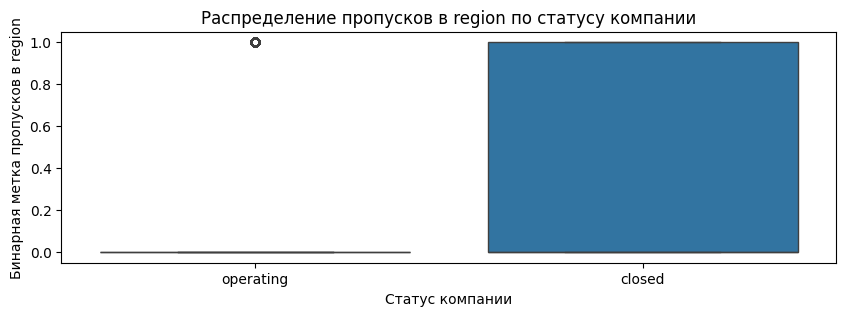

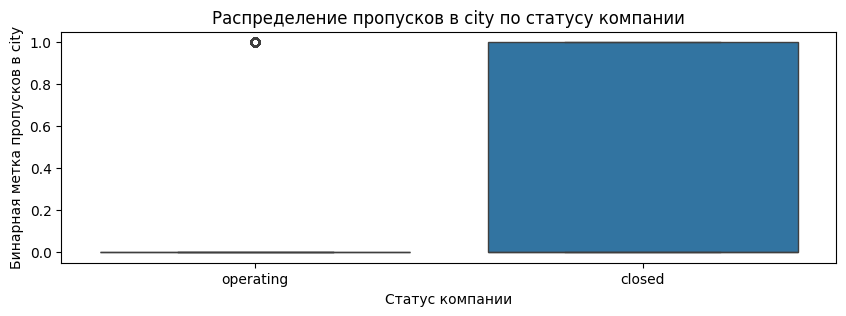

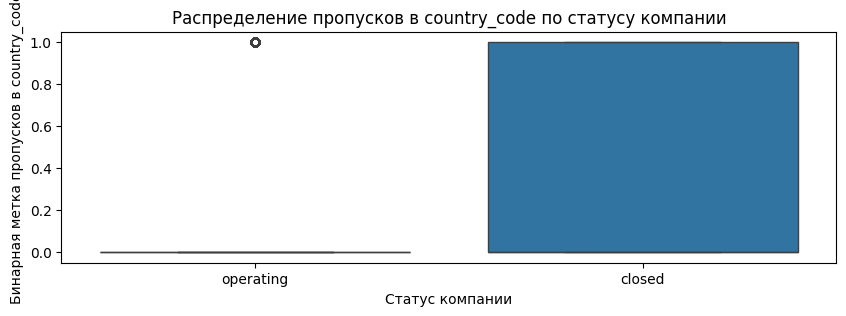

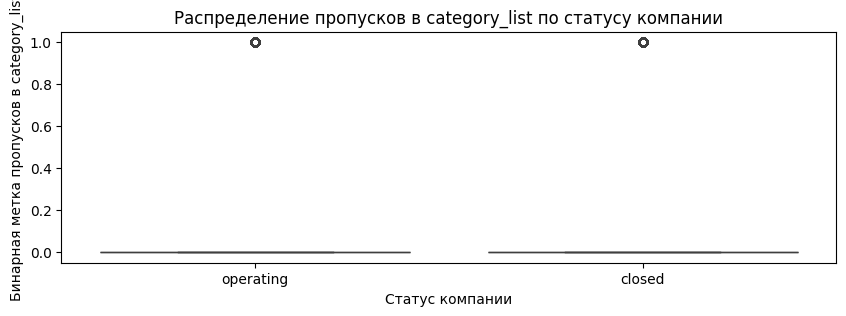

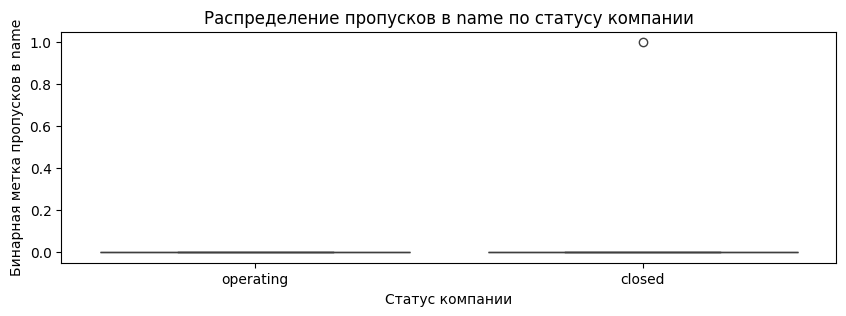

In [10]:
# добавлю бинарную метку пропущенных значений для каждого столбца
for col in missing_df.index:
    train[f"{col}_missing"] = train[col].isnull().astype(int)

# анализ распределения пропусков по категориям
categorical_cols = ['status', 'country_code', 'state_code', 'region', 'city']
for col in missing_df.index:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x='status', y=f"{col}_missing", data=train)
    plt.title(f"Распределение пропусков в {col} по статусу компании")
    plt.xlabel('Статус компании')
    plt.ylabel(f"Бинарная метка пропусков в {col}")
    plt.show()

Боксплот показывает, что почти все пропуски находятся в строках с уже заркытыми компаниями.

Посмотрю, пропуски в каких столбцах встречаются одновременно

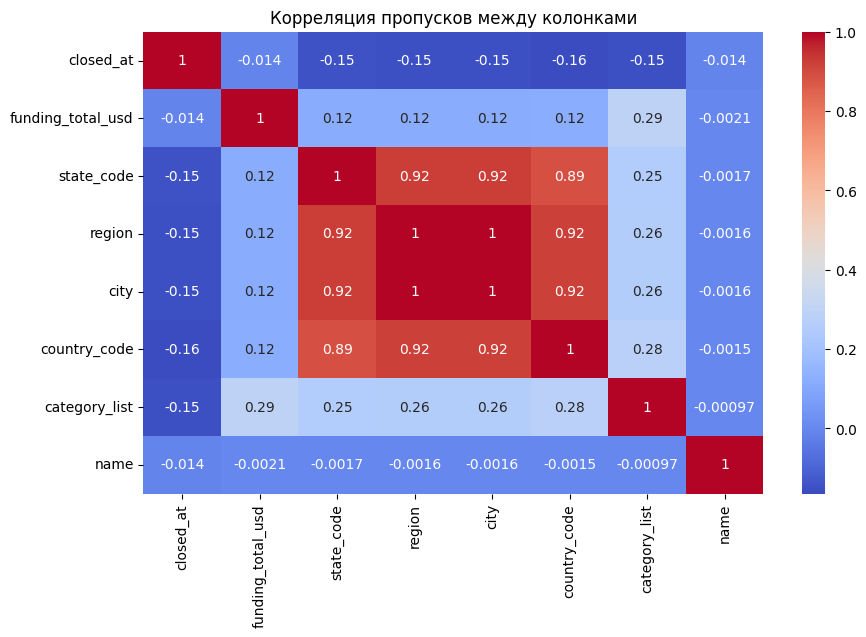

In [11]:
# корреляция между пропусками разных колонок
plt.figure(figsize=(10, 6))
sns.heatmap(train[missing_df.index].isnull().corr(), annot=True, cmap='coolwarm')
plt.title("Корреляция пропусков между колонками")
plt.show()


In [12]:
analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
funding_total_usd,10069,19.173204
state_code,6763,12.877980
region,6359,12.108691
city,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



Анализ пропусков показал, что  

#### Заполнение поля funding_total_usd

In [13]:
# разделю данные на обучающую и тестовую выборки
# в тестовую выборку войдут все значения с пропусками, чтобы их предсказывать
train_data_funding_total_usd = train[train['funding_total_usd'].notnull()]
test_data_funding_total_usd = train[train['funding_total_usd'].isnull()]

In [14]:
# определю признаки и целевую переменную
X_train_funding_total_usd = train_data_funding_total_usd.drop(columns=['funding_total_usd'])
y_train_funding_total_usd = train_data_funding_total_usd['funding_total_usd']

In [15]:
# преобразую категориальные и числовые переменные
categorical_cols = X_train_funding_total_usd.select_dtypes(include=['object']).columns
numerical_cols = X_train_funding_total_usd.select_dtypes(exclude=['object']).columns

# пайплайн для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

In [16]:
# общий пайплайн с регрессией дерева решений
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', DecisionTreeRegressor())
])

In [17]:
# обучение модели и предсказание
model.fit(X_train_funding_total_usd, y_train_funding_total_usd)

# предсказание
X_test_funding_total_usd = test_data_funding_total_usd.drop(columns=['funding_total_usd'])
predictions = model.predict(X_test_funding_total_usd)

In [18]:
train.loc[train['funding_total_usd'].isnull(), 'funding_total_usd'] = predictions

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
state_code,6763,12.877980
city,6359,12.108691
region,6359,12.108691
country_code,5502,10.476807
category_list,2465,4.693808
name,1,0.001904
status,0,0.000000
funding_total_usd,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



In [19]:
train.describe()

,funding_total_usd,funding_rounds,closed_at_missing,funding_total_usd_missing,state_code_missing,region_missing,city_missing,country_code_missing,category_list_missing,name_missing
count,5.251600e+04,52516.000000,52516.000000,52516.000000,52516.000000,52516.000000,52516.000000,52516.000000,52516.000000,52516.000000
mean,1.514747e+07,1.740670,0.906371,0.191732,0.128780,0.121087,0.121087,0.104768,0.046938,0.000019
std,1.685267e+08,1.374522,0.291314,0.393667,0.334959,0.326231,0.326231,0.306257,0.211508,0.004364
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.200000e+06,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.320727e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.007950e+10,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Заполнение пропусков с применением моделирования прошло успешно, пропусков больше нет, а все значения должны быть максимально близки к реальности, т.к. применялась модель МО.

*Ранее применялась модель LinearRegression, которая при обучении применила отрицательные значения в пропуски, хотя их быть не может. Предполагаю, что это произошло из-за особой чувствительности модели к выбросам, поэтому, после применения регрессии дерева решений, модели менее чувствительной к выбросам, отрицательное финансирование пропало.* 

#### Заполнение category_list

In [20]:
# функция для заполнения пропусков в указанном столбце
def fill_missing_values(df, column_name):
    # разделение данных на обучающую и тестовую выборки
    train_data = df[df[column_name].notnull()]
    test_data = df[df[column_name].isnull()]

    if test_data.empty:
        print(f"нет пропусков в столбце '{column_name}'.")
        return  # если нет пропусков, выходим из функции

    # определение признаков и целевой переменной
    X_train = train_data.drop(columns=[column_name])
    y_train = train_data[column_name]

    # преобразование категориальных и числовых переменных
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), X_train.select_dtypes(include=['object']).columns),
            ('num', 'passthrough', X_train.select_dtypes(exclude=['object']).columns)
        ]
    )

    # создание модели KNeighborsClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=15))
    ])

    # обучение модели
    model.fit(X_train, y_train)

    # предсказание для тестовой выборки
    X_test = test_data.drop(columns=[column_name])
    predictions = model.predict(X_test)

    # заполнение пропусков в указанном столбце
    df.loc[df[column_name].isnull(), column_name] = predictions

    # анализ
    analyze_dataframe(df, column_name)

In [21]:
fill_missing_values(train, 'category_list')

Анализ: category_list
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
state_code,6763,12.877980
city,6359,12.108691
region,6359,12.108691
country_code,5502,10.476807
name,1,0.001904
status,0,0.000000
category_list,0,0.000000
funding_total_usd,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



#### Заполнение country_code - state_code - region - city

In [22]:
columns_to_impute = ['state_code', 'region', 'city', 'country_code']

# кодирование признаков в числовые (Label Encoding)

label_encoders_train = {}
for col in columns_to_impute:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    label_encoders_train[col] = le

# KNN для заполнения пропусков
imputer = KNNImputer(n_neighbors=5)
train[columns_to_impute] = imputer.fit_transform(train[columns_to_impute])

# декодирование обратно в категории
for col in columns_to_impute:
    train[col] = label_encoders_train[col].inverse_transform(train[col].astype(int))

In [23]:
analyze_dataframe(train, 'train')
train.head(10)

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
closed_at,47599,90.637139
name,1,0.001904
category_list,0,0.000000
status,0,0.000000
funding_total_usd,0,0.000000
country_code,0,0.000000
state_code,0,0.000000
city,0,0.000000
region,0,0.000000
funding_rounds,0,0.000000


Дубликаты: 0



,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,...,last_funding_at,closed_at,closed_at_missing,funding_total_usd_missing,state_code_missing,region_missing,city_missing,country_code_missing,category_list_missing,name_missing
0,lunchgate,online reservations restaurants,828626.0,operating,che,25,zurich,zürich,2,2009-10-17,...,2014-12-01,NaN,1,0,0,0,0,0,0,0
1,earlens,manufacturing medical medical devices,42935019.0,operating,usa,ca,sf bay area,redwood city,4,2005-01-01,...,2014-02-25,NaN,1,0,0,0,0,0,0,0
2,reviva pharmaceuticals,biotechnology,35456381.0,operating,usa,ca,sf bay area,san jose,3,2006-01-01,...,2014-07-02,NaN,1,0,0,0,0,0,0,0
3,sancilio and company,health care,22250000.0,operating,nan,nan,nan,nan,3,2004-01-01,...,2014-07-18,NaN,1,0,1,1,1,1,0,0
4,wiretough cylinders,manufacturing,500000.0,operating,usa,va,va - other,bristol,1,2010-05-12,...,2012-02-01,NaN,1,1,0,0,0,0,0,0
5,connected sports ventures,mobile,4300000.0,operating,usa,nj,newark,princeton,1,2011-04-16,...,2012-11-12,NaN,1,0,0,0,0,0,0,0
6,attensity,analytics business analytics social crm social...,90000000.0,operating,usa,ca,sf bay area,redwood city,1,2000-01-01,...,2014-05-14,NaN,1,0,0,0,0,0,0,0
7,mesh networks,software,4300000.0,operating,usa,tx,houston,houston,1,2005-01-01,...,2014-11-09,NaN,1,0,0,0,0,0,0,0
8,angioscore,biotechnology,42000000.0,operating,usa,ca,sf bay area,fremont,2,2003-01-01,...,2011-04-20,NaN,1,0,0,0,0,0,0,0
9,vidatronic,semiconductors,1250500.0,operating,usa,tx,austin,college station,2,2010-01-01,...,2013-03-21,NaN,1,0,0,0,0,0,0,0


Пропуски ктегориальных полей заполнены. Наверняка, не идеально, но точно лучше, чем могли бы быть заполнены, например, наиболее частыми значениями.

In [24]:
train.query('country_code == "nan"').count()

name                         5502
category_list                5502
funding_total_usd            5502
status                       5502
country_code                 5502
state_code                   5502
region                       5502
city                         5502
funding_rounds               5502
founded_at                   5502
first_funding_at             5502
last_funding_at              5502
closed_at                    1286
closed_at_missing            5502
funding_total_usd_missing    5502
state_code_missing           5502
region_missing               5502
city_missing                 5502
country_code_missing         5502
category_list_missing        5502
name_missing                 5502
dtype: int64

5502 зависимых значений country_code - state_code - region - city так и остались пустыми. 

Принимать решение по их заполнению или удалению буду после обучения модели для предсказаний по результатам основной метрики.

### Обработка типов данных

In [25]:
# преобразование типов данных для обучающей выборки
train['founded_at'] = pd.to_datetime(train['founded_at'], errors='coerce')
train['first_funding_at'] = pd.to_datetime(train['first_funding_at'], errors='coerce')
train['last_funding_at'] = pd.to_datetime(train['last_funding_at'], errors='coerce')
train['closed_at'] = pd.to_datetime(train['closed_at'], errors='coerce')

# преобразование типов данных для тестовой выборки
test['first_funding_at'] = pd.to_datetime(test['first_funding_at'], errors='coerce')
test['last_funding_at'] = pd.to_datetime(test['last_funding_at'], errors='coerce')

# проверка информации о дф после преобразований
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       52515 non-null  object        
 1   category_list              52516 non-null  object        
 2   funding_total_usd          52516 non-null  float64       
 3   status                     52516 non-null  object        
 4   country_code               52516 non-null  object        
 5   state_code                 52516 non-null  object        
 6   region                     52516 non-null  object        
 7   city                       52516 non-null  object        
 8   funding_rounds             52516 non-null  int64         
 9   founded_at                 52516 non-null  datetime64[ns]
 10  first_funding_at           52516 non-null  datetime64[ns]
 11  last_funding_at            52516 non-null  datetime64[ns]
 12  clos

#### Заполнение поля closed_at

In [26]:
# заполню пропуски NaT, где status = 'operating'
train.loc[train['status'] == 'operating', 'closed_at'] = pd.NaT

# заполню остальные пропуски значением last_funding_at + 1 год
train['closed_at'] = train['closed_at'].fillna(train['last_funding_at'] + pd.DateOffset(years=1))

In [27]:
train['name'] = train['name'].fillna('unknown')

analyze_dataframe(train, 'train')

Анализ: train
Количество пропусков в каждом столбце:


,Количество пропусков,"Доля, %"
name,0,0.0
category_list,0,0.0
funding_total_usd,0,0.0
status,0,0.0
country_code,0,0.0
state_code,0,0.0
region,0,0.0
city,0,0.0
funding_rounds,0,0.0
founded_at,0,0.0


Дубликаты: 0



Все пропуски успешно обработаны, дубликаты не найдены.

In [28]:
# удаление столбцов с бинарными метками, оканчивающихся на '_missing'
# которые были созданы при анализе пропусков и использованы для обучения моделей при заполнении пропусков
train = train.loc[:, ~train.columns.str.endswith('_missing')]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52516 non-null  object        
 1   category_list      52516 non-null  object        
 2   funding_total_usd  52516 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       52516 non-null  object        
 5   state_code         52516 non-null  object        
 6   region             52516 non-null  object        
 7   city               52516 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          52516 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

### Вывод по предобработке данных

В ходе предобработки данных были выполнены следующие шаги:

1. **Обработка дубликатов**:
   - Применена функция `preprocess_column`, которая преобразует текстовые данные в нижний регистр и заменяет символы подчеркивания и вертикальные линии пробелами. Это позволило устранить неявные дубликаты в столбцах.
   - Произведен анализ количества дубликатов в каждом столбце, однако явных дубликатов в данных не обнаружено.

2. **Обработка пропусков**:
   - Пропуски в данных были тщательно проанализированы:
     - Столбцы с числовыми значениями (`funding_total_usd`) были заполнены с помощью линейной регрессии.
     - Для категориальных данных (`category_list`) использовалась модель KNN для предсказания пропущенных значений.
     - Столбец `closed_at` был заполнен значениями из `last_funding_at`, с добавлением одного года, для строк с закрытыми компаниями, а для работающих компаний значение было оставлено как NaT.
     - Пропуски в поле `name` были заполнены значением "unknown".
   
3. **Анализ пропусков**:
   - Выявлены сильные корреляции между пропусками в столбцах `country_code`, `state_code`, `region` и `city`, что указывает на возможную зависимость между этими признаками. Было принято решение о том, что поля `region` и `city` можно объединить или одно из них удалить.
   - Пропуски в столбцах `country_code`, `state_code`, `region` и `city` в основном присутствуют в строках с закрытыми компаниями, что подтверждается визуализацией пропусков через боксплоты.

4. **Обработка категориальных данных**:
   - Для обработки категориальных данных применены различные методы, включая `OneHotEncoder` для создания числовых признаков и `KNNImputer` для заполнения пропусков в столбцах, таких как `country_code - state_code - region - city`.

5. **Итоговый анализ**:
   - После применения моделей для заполнения пропусков, все пропуски были успешно устранены, и данные готовы для дальнейшего анализа или построения моделей машинного обучения.

В результате проделанных шагов, данные теперь не имеют пропусков и могут быть использованы для дальнейшего анализа и построения предсказательных моделей.

## Исследовательский анализ данных

Для начала разделю данные на категориальные и числовые

In [29]:
# разделение данных
numerical_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

print(f"Числовые переменные: {list(numerical_features)}")
print(f"Категориальные переменные: {list(categorical_features)}")


Числовые переменные: ['funding_total_usd', 'funding_rounds']
Категориальные переменные: ['name', 'category_list', 'status', 'country_code', 'state_code', 'region', 'city']


In [30]:
# функция для визуализации количественных данных
def hist_box_df(df, column, title):
    """
    Визуализация количественных данных: гистограмма, диаграмма размаха (Boxplot)
    """
    plt.figure(figsize=(16, 6))
    plt.suptitle(title, fontsize=16)

    # если признак дискретный, используем countplot
    if df[column].nunique() < 20:
        sns.countplot(data=df, x=column, color='gold', alpha=0.7, edgecolor='black')
        plt.title('Количество уникальных значений')
        plt.xlabel(title)
        plt.ylabel('Частота')
        plt.xticks(rotation=45)
    else:
        # гистограмма с плотностью для непрерывных признаков
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=70, kde=True, color='gold', alpha=0.7)
        plt.title('Гистограмма')
        plt.xlabel(title)
        plt.ylabel('Частота')

        # ящик с усами
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column], color='gold')
        plt.title('Ящик с усами')
        plt.xlabel(title)
    
    plt.tight_layout()
    plt.show()

### Количественные признаки

#### funding_total_usd

In [31]:
train.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
count,5.251600e+04,52516.000000,52516,52516,52516,52516
mean,1.514747e+07,1.740670,2008-11-04 09:44:16.196206848,2011-07-17 04:45:33.247010304,2012-06-27 16:29:42.313961472,2013-07-14 09:00:20.565160960
min,1.000000e+00,1.000000,1970-02-05 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,1978-05-15 00:00:00
25%,1.500000e+05,1.000000,2006-10-01 00:00:00,2009-10-12 00:00:00,2011-02-01 00:00:00,2012-02-24 00:00:00
50%,1.200000e+06,1.000000,2010-10-01 00:00:00,2012-07-23 00:00:00,2013-08-30 00:00:00,2014-09-02 00:00:00
75%,7.320727e+06,2.000000,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,2015-11-22 00:00:00
max,3.007950e+10,19.000000,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2017-10-21 00:00:00
std,1.685267e+08,1.374522,NaN,NaN,NaN,NaN


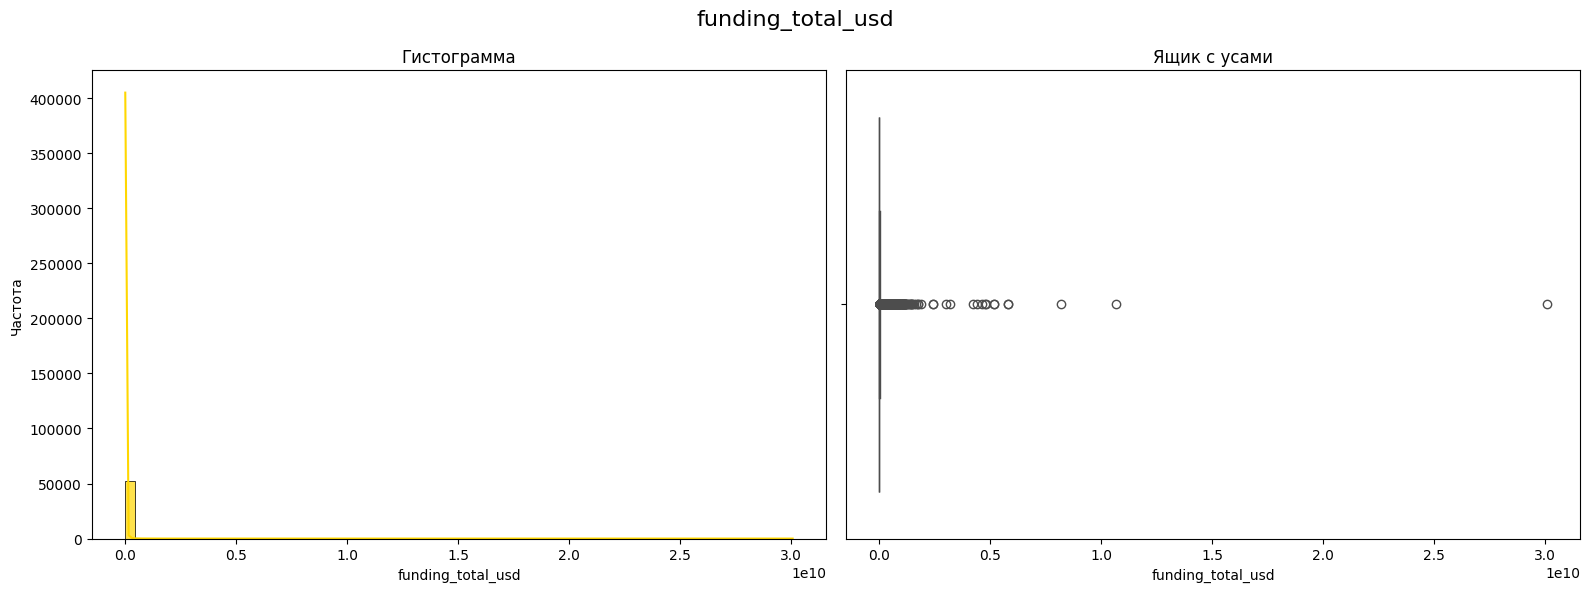

In [32]:
hist_box_df(train, 'funding_total_usd', 'funding_total_usd')

На данный момент, распределение в данных не видно из-за присутсвтия огромного количества выбросов и слишком большого разброса данных, от которых нельзя просто избавиться для сужения диапазона и получения адекватной гистограммы, поэтому есть несколько возможных вариантов для решения этой проблемы:
  - Применить категоризацию данных и посмотреть распределения по категориям;
  - Применить маштабирование данных и затем получить гистограмму;
  - Использовать логарифмическую трансформацию данных.

Буду использовать последний вариант

В данных присутсвует компания с суммой финансирования более 30 млрд. В данном датасете это явный выброс, проанализировать такую компанию наравне с остальными врядли получится, потому что она одна. Удалю ее

In [33]:
train.query('funding_total_usd >= 3.007950e+10')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
39186,verizon communications,communications infrastructure information tech...,3.007950e+10,operating,usa,ny,new york city,new york,5,1983-10-07,2010-01-26,2014-02-28,2015-02-28


In [34]:
train = train.query('name != "verizon communications"')
train.query('funding_total_usd >= 3.000000e+10')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at


Проверю, отразилось ли удаление этого выброса на гистограмме

*График почти не изменился, распределения все еще не видно, применю логарифмирование*

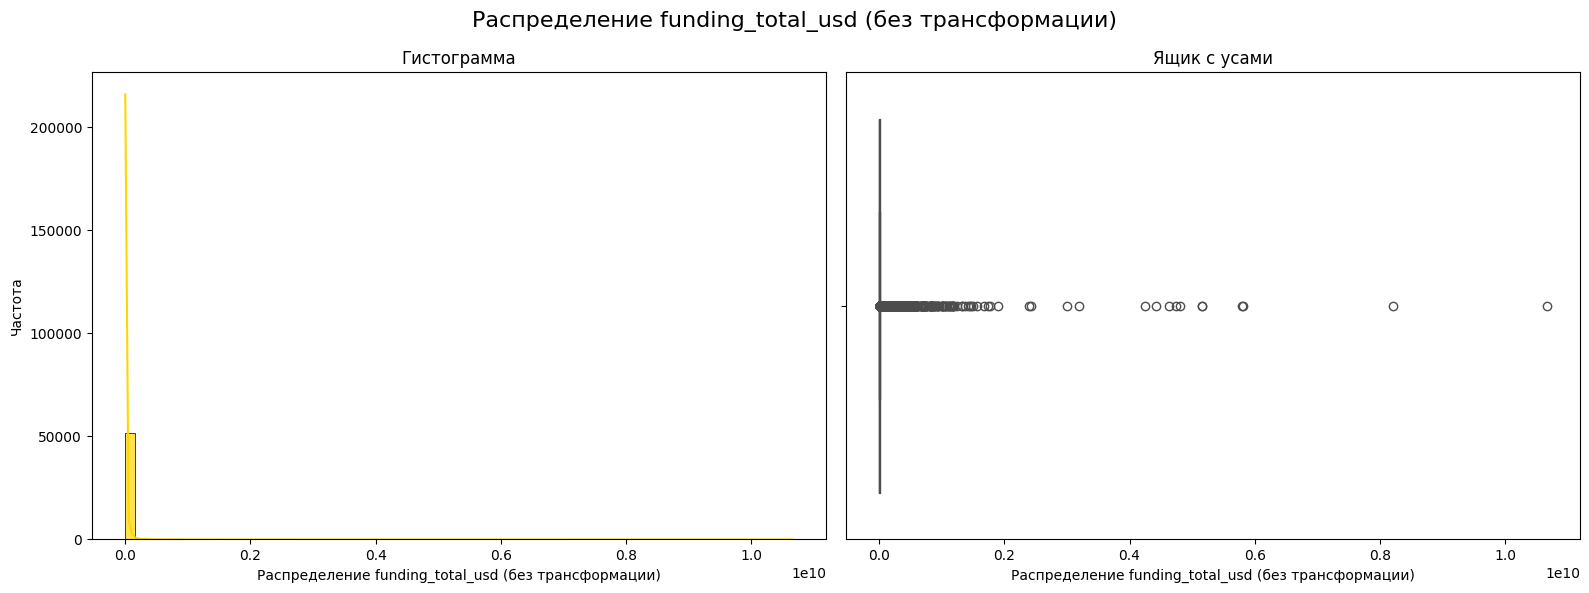

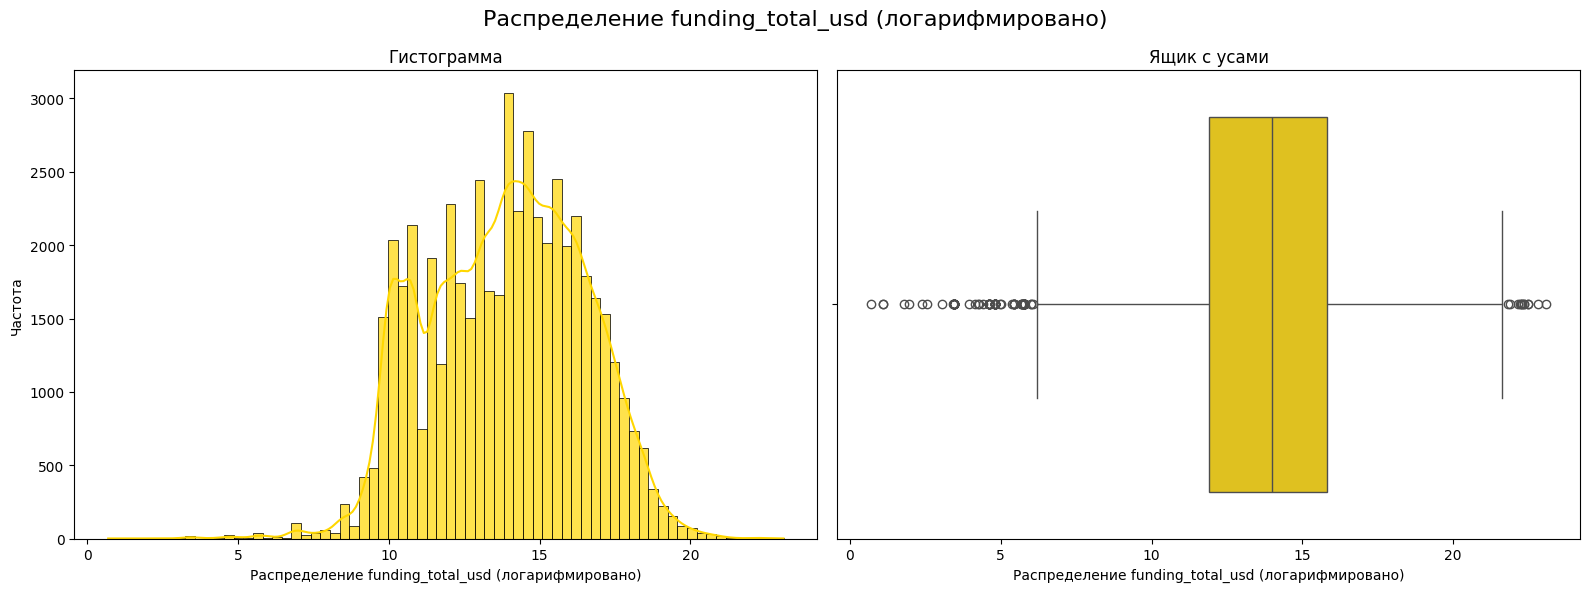

Квантили funding_total_usd:
0.01         5000.0
0.25       150000.0
0.50      1200000.0
0.75      7319322.0
0.99    194430000.0
Name: funding_total_usd, dtype: float64


In [35]:
# визуализация исходного распределения funding_total_usd
hist_box_df(train, 'funding_total_usd', 'Распределение funding_total_usd (без трансформации)')

# визуализация логарифмированного распределения funding_total_usd
train['funding_total_usd_log'] = np.log1p(train['funding_total_usd'])
hist_box_df(train, 'funding_total_usd_log', 'Распределение funding_total_usd (логарифмировано)')

# анализ квантилей funding_total_usd
percentiles = train['funding_total_usd'].quantile([0.01, 0.25, 0.5, 0.75, 0.99])
print("Квантили funding_total_usd:")
print(percentiles)

- Распределение напоминает нормальное, смещенное вправо, с несколькими пиками в районе значений 10-12 и 15, но его нельзя назвать бимодальным.
- Выбросы, согласно ящику с усами и анализу квантилей есть, но избавиться от них не представляется возможным, так как они имеют значение для данных.

### Категориальнные признаки

In [36]:
# фукнция для категориальных значений
def bar_plotter(df, column, title):
    plt.figure(figsize=(12, 5))
    
    counts = df[column].value_counts()

    bars = plt.bar(counts.index, counts.values, color='gold', edgecolor='black', alpha=0.7)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Центрируем текст

    plt.title(title)
    plt.ylabel('Количество')
    plt.xlabel(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    plt.show()

#### funding_rounds

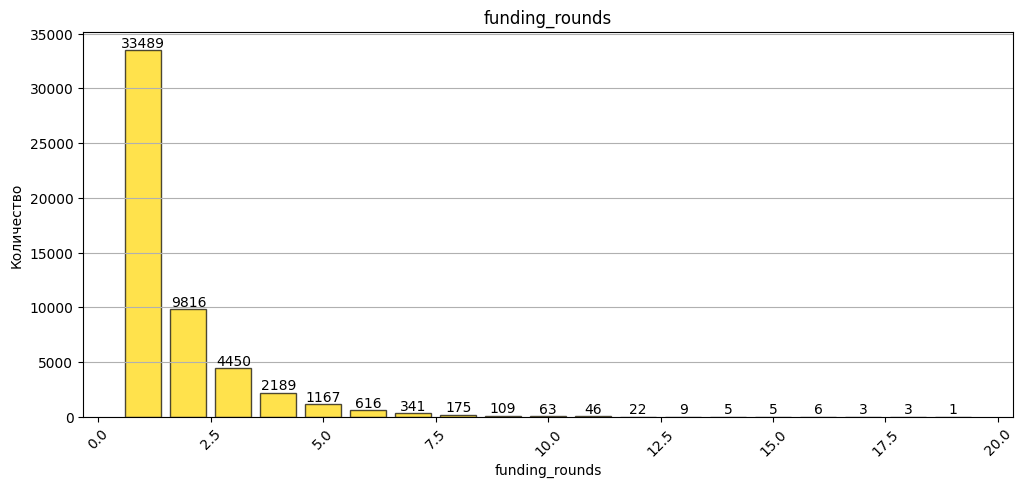

In [37]:
bar_plotter(train, 'funding_rounds', 'funding_rounds')

Согласно гистограмме, большинство компаний финансируются уже при первом раунде.

#### category_list

In [38]:
print("Количество уникальных категорий:", train['category_list'].nunique())
print("Топ-5 категорий по частоте:")
print(train['category_list'].value_counts().head(5))

Количество уникальных категорий: 22090
Топ-5 категорий по частоте:
category_list
software            3913
biotechnology       3100
e-commerce          1129
mobile               949
clean technology     945
Name: count, dtype: int64


Количество уникальных категорий в этом поле 22089. Стандартными методами такое проанализировать невозможно, поэтому применим категоризацию по уникальным словам - отнесем к конкретной категории при наличии слова, описывающего род деятельности

In [39]:
# определение категорий и ключевых слов для каждой группы
categories = {
    "technology": [
        "software", "cloud computing", "technology", "it", "saas", "cybersecurity", "big data", "analytics", "machine learning", 
        "artificial intelligence", "data mining", "security", "network security", "information security", 
        "computer vision", "algorithms", "content security", "data centers", "automation", "engineering", 
        "it management", "real time", "data visualization", "biometrics", "consulting", "broadcasting", "q&a", 
        "semiconductors", "telecommunications", "networking", "hardware", "mobile networking", 
        "wireless", "internet services", "cloud infrastructure", "robotics", "digital signage", 
        "communications hardware", "intellectual asset management", "virtualization", "curated web", 
        "mobile web development", "apps", "application platforms", "internet of things", "tracking", 
        "messaging", "mobile technology", "3d technology", "mobile commerce", 
        "location based services", "mobile synchronization", "mobile search", "eyewear technology", 
        "adaptive equipment manufacturing", "geospatial navigation sensors", "wearable technology", 
        "games", "mobile games", "android", "ios", "ipad", "mobile tablets", "watch", "new technologies", 
        "development platforms", "gamification", "internet mobile devices services", "game mechanics", 
        "virtual currency", "smartphones", "chat services", "mobile sns", "3d rapidly expanding", 
        "simulation skill assessment", "electric vehicles", "databases", "storage", 
        "mobile", "consumers", "moneymaking", "oil services", "design services", "systems", "web hosting", 
        "alumni", "internet service providers", "service providers", "computers", 
        "iphone", "local businesses", "collaboration", "communications infrastructure", "match-making", 
        "semiconductor manufacturing equipment", "industrial mechanical solutions", 
        "micro-enterprises", "cloud data services", "game", "mobile reviews and recommendations", 
        "mining technologies", "information services", "web development", "mobile services", 
        "cad", "3d services", "audio mobile", "sms", "lighting manufacturing", "maps", "ticketing", "pre seed", 
        "industrial services", "emerging markets", "gambling", "systems", "visualization", 
        "virtual workforces", "building products", "geospatial", "new product development", "construction", 
        "enterprise resource planning", "cloud management", 
        "developer tools", "spas", "entrepreneur", "mobile telephony", "e-books", "optical communications", 
        "interface design", "sextech", "data integration", "web browsers", 
        "domains", "religion", "billing", "high tech", "twin-tip skis", "industrial manufacturing", 
        "contact management", "email services", "information technology", "internet", "services technology", 
        "services", "design interior design internet", "internet self development services", 
        "information technology services technology", "defense information technology services", 
        "business services services", "design governments technology", "internet leisure services", "web tools", 
        "mechanical solutions services technology", "information technology services", "voip", 
        "sensors technology", "consumer behavior technology", "business services tech field support", 
        "business services developer apis technology", "services user experience design user interface", 
        "information technology technology", "infrastructure services technology", "shipping technology", 
        "design technology wholesale", "design graphic design user experience design", "public safety technology", 
        "search", "local search", "search visual search", "product search", "search semantic search", 
        "natural language processing search", "b2b", "b2b innovation management intellectual property", 
        "bridging online and offline developer apis peer-to-peer", "developer apis"
    ],

    "business": [
        "business intelligence", "coworking", "social commerce", "m2m", "crowdsourcing", "customer service", 
        "professional services", "optimization", "sex industry", 
        "collaborative consumption", "textiles", "staffing firms", "project management", "document management", "shared services", 
        "b2b", "outsourcing",  "manufacturing", "business development", "market research", "training", "small and medium businesses", 
        "corporate training services", "business services games", "business services design", 
        "business services content", "business services internet", "product design", "business services gps information technology", 
        "business services tech field support", "business services developer apis technology", "business services services", 
        "enterprise resource planning", "brokers", "business services shipping", "business services information technology", 
        "business services virtual workforces", "business services outsourcing", "business services product development"
    ],

    "services & infrastructure": [
        "web hosting", "internet service providers", "service providers", "social commerce", 
        "iphone", "local businesses", "collaboration", "communications infrastructure", "match-making", 
        "aerospace", "defense services", "cannabis", "semiconductor manufacturing equipment", 
        "industrial mechanical solutions", "staffing firms", "micro-enterprises", "cloud data services", 
        "mobile services", "cad", "3d services", "women", "audio mobile", "translation", "aquaculture", 
        "sms", "sporting goods", "email", "lighting manufacturing", "maps", "ticketing", "pre seed", 
        "industrial services", "emerging markets", "genetic testing", "gambling", "systems", "content", 
        "visualization", "virtual workforces", "building products", "geospatial", "new product development", 
        "construction", "industrial", "governance", "cloud management", "language learning", "textiles", 
        "developer tools", "spas", "entrepreneur", "office space", "online dating", "distribution", 
        "heavy industry", "ediscovery", "polling", "presentations", "biomass power generation", 
        "early-stage technology", "cable", "gift card", "creative design", "mobile telephony", "e-books", 
        "optical communications", "animal feed", "interface design", "hotels", "sex industry", "sextech", 
        "data integration", "web browsers", "domains", "religion", "billing", "coworking", "high tech", 
        "twin-tip skis", "industrial manufacturing", "contact management", "email services", 
        "information technology", "internet", "design", "services technology", "services", "design interior design internet", 
        "internet self development services", "information technology services technology", 
        "defense information technology services", "business services services", "design governments technology", 
        "internet leisure services", "web tools", "mechanical solutions services technology", 
        "information technology services", "voip", "design web design", "sensors technology", 
        "consumer behavior technology", "business services tech field support", 
        "services user experience design user interface", "information technology technology", 
        "infrastructure services technology", "point of sale", "point of sale services technology", 
        "technology test and measurement", "technology voip", "services water", "shipping technology", 
        "design technology wholesale", "design graphic design user experience design", "public safety technology", 
        "search", "local search", "search visual search", "product search", "search semantic search", 
        "natural language processing search", "b2b", "b2b small and medium businesses", "b2b innovation management intellectual property", 
        "bridging online and offline developer apis peer-to-peer"
    ],
    
    "medical & biotech": [
        "medical", "healthcare", "biotechnology", "pharmaceuticals", "diagnostics", "health", "wellness", 
        "life sciences", "organic", "therapeutics", "biometrics", "veterinary", "nutrition", "bio-pharm", 
        "clinical trials", "alternative medicine", "elder care", "dental", "telemedicine", "bioinformatics"
    ],
    
    "finance & investment": [
        "finance", "brokers", "banking", "payments", "investment", "financial services", "trading", "bitcoin", 
        "virtual currency", "insurance", "stock exchanges", "crowdfunding", "p2p money transfer", 
        "fintech", "loyalty programs", "risk management", "price comparison", "gift registries", 
        "financial exchanges"
    ],
    
    "marketing & advertising": [
        "advertising", "design", "content", "social media", "content syndication", "lead generation", "branding", 
        "monetization", "seo", "brand marketing", "marketing automation", "internet marketing", 
        "public relations", "opinion", "advice", "crm", "sales and marketing", "app marketing", 
        "search marketing", "email marketing", "performance marketing", 
        "reviews and recommendations", "internet reviews and recommendations services",
        "blogging platforms", "blogging platforms design technology"
    ],
    
    "e-commerce & retail": [
        "e-commerce", "shopping", "auctions", "retail", "marketplaces", "fashion", "home decor", 
        "personalization", "subscription businesses", "printing", "handmade", "discounts", "coupons", 
        "app stores", "electronics", "shoes", "jewelry", "wine and spirits", "furniture", 
        "gift cards", "group buying", "social buying", "mobile price comparison",
        "classifieds", "consumer internet", "local commerce", "internet leisure online reservations",
        "vending and concessions", "business services gift exchange", "direct sales information technology internet"
    ],
    
    "entertainment & media": [
        "entertainment", "music", "product design", "film", "television", "gaming", "video", "media", "social games", 
        "virtual worlds", "photo sharing", "photography", "news", "journalism", "broadcasting", 
        "creative industries", "events", "publishing", "graphics", "writers", "art", "performing arts", 
        "comics", "audio blogging", "ebooks", "audiobooks", "audio", "internet radio market"
    ],
    
    "transport & travel": [
        "travel", "hotels", "transportation", "tourism", "automotive", "online rental", "cars", "parking", 
        "mobility", "logistics", "delivery", "supply chain management", "fleet management", 
        "taxis", "ride sharing", "drones", "unmanned air systems", "postal and courier services", 
        "electric vehicles", "bicycles", "racing", "boating industry"
    ],
    
    "education & hr": [
        "education", "language learning", "language learning", "recruiting", "human resources", "college recruiting", "employment", "teachers", 
        "tutoring", "mentorship", "startups", "professional networking", "freelancers", "career management", 
        "corporate training", "online scheduling", "edtech", "colleges", "all students", "high schools",
        "kids private school services"
    ],
    
    "ecology & science": [
        "clean technology", "environmental", "solar", "wind", "nanotechnology", "energy", "water purification", 
        "recycling", "green", "farming", "agriculture", "food processing", "batteries", "alternative energy", 
        "material science", "natural resources", "renewable energies", "advanced materials", "waste management", 
        "chemicals", "specialty chemicals", "fuels", "minerals", "gold"
    ],
    
    "consumer & lifestyle": [
        "consumer goods", "nutrition", "organic food", "sports", "fitness", "wellness", "beauty", 
        "cosmetics", "fashion", "lifestyle", "home automation", "wearables", "specialty foods", 
        "pets", "child care", "baby products", "cooking", "tea", "coffee", "home & garden", "restaurants", 
        "real estate", "rental housing"]
}

# функция для категоризации
def categorize_category_list(category_str):
    if pd.isna(category_str):
        return "other"  # если NaN, отнесем в "другое"
    
    category_str = category_str.lower()
    
    for category, keywords in categories.items():
        if any(keyword in category_str for keyword in keywords):
            return category  # назначаю первую найденную категорию

    return "other"  # если не попало ни в одну категорию

# новый столбец с категоризацией
train["category_group"] = train["category_list"].apply(categorize_category_list)

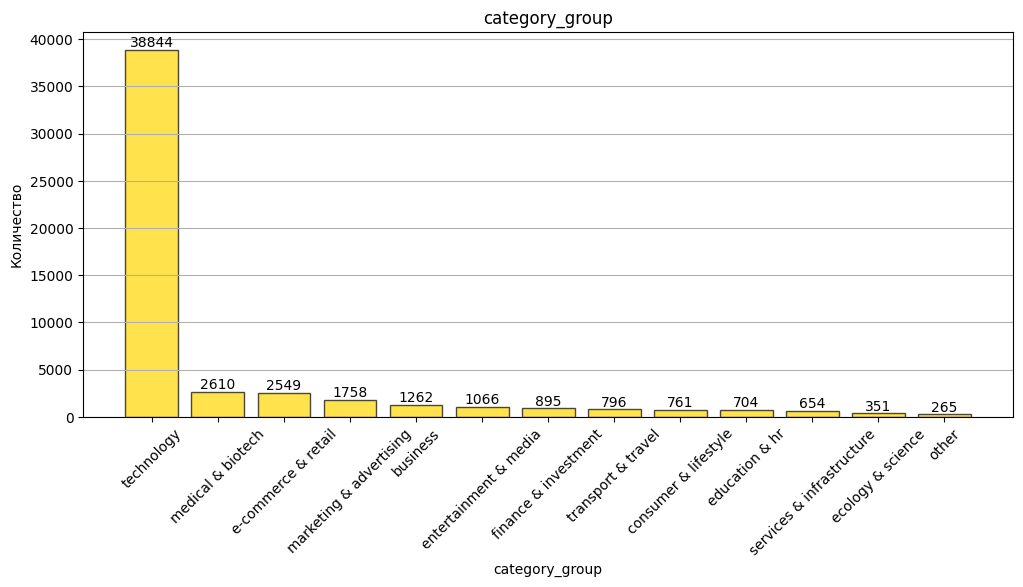

In [40]:
bar_plotter(train, 'category_group', 'category_group')

1. Наибольшее количество компаний в датасете - технологические.
2. Второе, и третье место разделили между собой ритейлеры и медицинские.

#### status

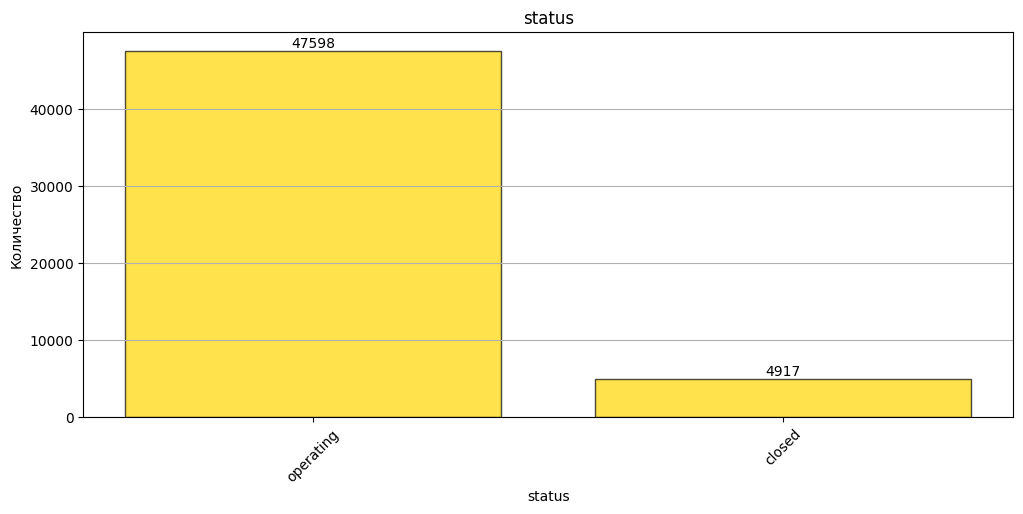

In [41]:
bar_plotter(train, 'status', 'status')

Из 52515 компаний, 47598 на 2022 год продолжают существовать и только 4917 из них прекратили деятельность

#### country_code

In [42]:
print("Количество уникальных категорий:", train['category_list'].nunique())
print("Топ-5 категорий по частоте:")
print(train['country_code'].value_counts().head())

Количество уникальных категорий: 22090
Топ-5 категорий по частоте:
country_code
usa    29701
nan     5502
gbr     2925
can     1540
ind     1276
Name: count, dtype: int64


22090 уникальных значений и их нет смысла категоризировать.

1. Первое место в топе размещения компаний занимает США - 29701 компания из датасета находятся там.
2. Второе место в топе размещения компаний занимает НЕ УКАЗАНО - информации о 5502 компаниях нет и восстановить ее невозможно по причине отсутсвия сразу всех зависимых значений.
3. Третье место в топе размещения компаний занимает Великобритания - 2925 компаний из датасета зарегистрированы там.

#### city

In [43]:
print("Количество уникальных категорий:", train['category_list'].nunique())
print("Топ-5 категорий по частоте:")
print(train['city'].value_counts().head())

Количество уникальных категорий: 22090
Топ-5 категорий по частоте:
city
nan              6359
san francisco    2824
new york         2485
london           1514
austin            609
Name: count, dtype: int64


1. Первое место в топе занимает НЕ УКАЗАНО - информации о 6359 компаниях нет и восстановить ее невозможно по причине отсутсвия сразу всех зависимых значений.
2. На втором месте находится город Сан-Франциско и не удивительно, учитывая то, что большая часть компаний в списке - технологические, а Калифорния - кремниевая долина.
3. Третье место занял Нью-Йорк, что так же ожидаемо, как и Сан-Франциско.

### Вывод по исследовательскому анализу данных

В ходе исследовательского анализа данных (EDA) был проведен детальный разбор датасета, включающий анализ числовых и категориальных переменных, выявление выбросов, трансформацию данных и категоризацию признаков.

---

**1. Разделение данных на числовые и категориальные переменные**  
На первом этапе были выделены два типа данных:  
- **Числовые переменные:** `funding_total_usd`, `funding_rounds`  
- **Категориальные переменные:** `name`, `category_list`, `status`, `country_code`, `state_code`, `region`, `city`  

Этот этап необходим для определения дальнейших методов анализа, так как числовые и категориальные переменные обрабатываются по-разному.

---

**2. Анализ числовых переменных**  

**2.1 Исходное распределение `funding_total_usd`**  
- Первоначальный анализ статистик (`describe()`) показал, что данные сильно разрежены, диапазон значений финансирования огромен – от $1 до $30 млрд.  
- Гистограмма выявила значительный разброс значений и наличие явных выбросов.  

**2.2 Работа с выбросами**  
- Был обнаружен экстремальный выброс – компания Verizon Communications с финансированием $30 млрд.  
- Так как она является единственным таким случаем и не поддается анализу в общем контексте, удалил его из датасета.  

**2.3 Трансформация данных**  
После удаления выброса распределение `funding_total_usd` осталось сильно скошенным. Было принято решение применить **логарифмическую трансформацию (`log1p`)**.  
- Логарифмирование позволило привести распределение к форме, более близкой к нормальному.  
- Анализ квантилей подтвердил наличие большого разброса в значениях финансирования, однако избавляться от всех выбросов нельзя, так как они имеют значимость в контексте анализа.  

---

**3. Анализ категориальных переменных**  

**3.1 `funding_rounds` (Количество раундов финансирования)**  
- Построенная гистограмма показала, что большинство компаний получают финансирование уже на первом раунде.  
- Значение медианы равно 1, что свидетельствует о преобладании компаний с единичными инвестициями.  

**3.2 `category_list` (Категории стартапов)**  
- Данный признак содержал **22 090 уникальных значений**, что делает его анализ сложным стандартными методами.  
- Была проведена **категоризация по ключевым словам**, относящим стартапы к более обобщенным группам, таким как:  
  - **Technology (Технологии)**
  - **Business (Бизнес)**
  - **Medical & Biotech (Медицина и биотехнологии)**
  - **Financial (Финансы)**
  - **Energy & Environment (Энергетика и экология)** и другие.  
- Категоризация позволила значительно упростить анализ распределения компаний по отраслям.  

---

**4. Основные выводы по анализу данных**  

1. **Распределение сумм финансирования (`funding_total_usd`)**  
   - Сильно скошенное вправо, с наличием значительных выбросов.  
   - Логарифмическое преобразование позволило сделать его более нормальным.  
   - Полное удаление выбросов невозможно, так как они являются важной частью данных.  

2. **Количество раундов финансирования (`funding_rounds`)**  
   - Большинство компаний получают финансирование на 1 раунде, что свидетельствует о высоком уровне стартапов, которым не удается привлечь дополнительные инвестиции.  

3. **Категории стартапов (`category_list`)**  
   - Большое количество уникальных значений (22 090) не позволяло провести стандартный анализ.  
   - Проведенная категоризация выявила ключевые направления стартапов, среди которых доминируют **технологии, биотехнологии, финансы и медицина**.  

4. **Выбросы**  
   - Удаление экстремального выброса (Verizon Communications) не оказало значительного влияния на общее распределение.  
   - Более детальный анализ показал, что выбросы в данных важны и не должны быть полностью удалены.  

5. **Методы обработки данных**  
   - Логарифмирование данных для работы со скошенными распределениями.  
   - Разделение категориальных переменных на более крупные группы с использованием ключевых слов.  
   - Анализ квантилей и визуализация данных с помощью гистограмм и диаграмм размаха.  

---

**Заключение**  
Проведенный исследовательский анализ данных позволил выявить ключевые особенности датасета, распределение значений, наличие выбросов и возможности их обработки. Категоризация данных помогла структурировать информацию, а логарифмическое преобразование – улучшить интерпретируемость числовых данных. В дальнейшем возможен более детальный анализ факторов, влияющих на привлечение финансирования, с применением машинного обучения.
